In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import os
import sys

In [19]:
project_root = os.path.abspath("..")
sys.path.append(os.path.join(project_root, "src"))

In [20]:
from eda_utils import (
    load_clean_data,
    show_basic_info,
    plot_histograms,
    plot_boxplots,
    plot_correlation,
    plot_category_boxplots,
    plot_pairplot
)


In [21]:
def load_clean_data(path="../Data/processed/dataset_clean.csv"):
    df = pd.read_csv(path)
    return df

df = load_clean_data()

In [22]:
display(Markdown("## Dataset cargado correctamente"))
df.head()

## Dataset cargado correctamente

,Temperature,Humidity,pH,Rainfall,Label,Category
0,20.879744,82.002744,6.502985,202.935536,Rice,Cereal
1,21.770462,80.319644,7.038096,226.655537,Rice,Cereal
2,23.004459,82.320763,7.840207,263.964248,Rice,Cereal
3,26.491096,80.158363,6.980401,242.864034,Rice,Cereal
4,20.130175,81.604873,7.628473,262.717340,Rice,Cereal


In [23]:
show_basic_info(df)

### Primeras 5 filas

,Temperature,Humidity,pH,Rainfall,Label,Category
0,20.879744,82.002744,6.502985,202.935536,Rice,Cereal
1,21.770462,80.319644,7.038096,226.655537,Rice,Cereal
2,23.004459,82.320763,7.840207,263.964248,Rice,Cereal
3,26.491096,80.158363,6.980401,242.864034,Rice,Cereal
4,20.130175,81.604873,7.628473,262.717340,Rice,Cereal


### Estadísticas descriptivas

,count,mean,std,min,25%,50%,75%,max
Temperature,7000.0,23.493807,6.755644,6.105382,18.948438,23.344269,27.686253,46.791488
Humidity,7000.0,71.318934,22.289074,6.029440,58.055782,77.238068,90.259315,99.981876
pH,7000.0,6.454138,0.667650,3.504752,6.049754,6.406537,6.859321,9.935091
Rainfall,7000.0,751.476229,825.472175,20.211267,123.595859,644.904867,1051.049795,5989.995521


### Conteo por categoría

Category
Vegetable          2100
Fruit              1300
Commercial Crop    1100
Legume              900
Other               600
Cereal              400
Medicinal           200
Flower              200
Spice               200
Name: count, dtype: int64

In [24]:
numeric_cols = ["Temperature", "Humidity", "pH", "Rainfall"]

In [25]:

display(Markdown("##  Columnas numéricas analizadas"))
numeric_cols

##  Columnas numéricas analizadas

['Temperature', 'Humidity', 'pH', 'Rainfall']

##  Histogramas de variables numéricas

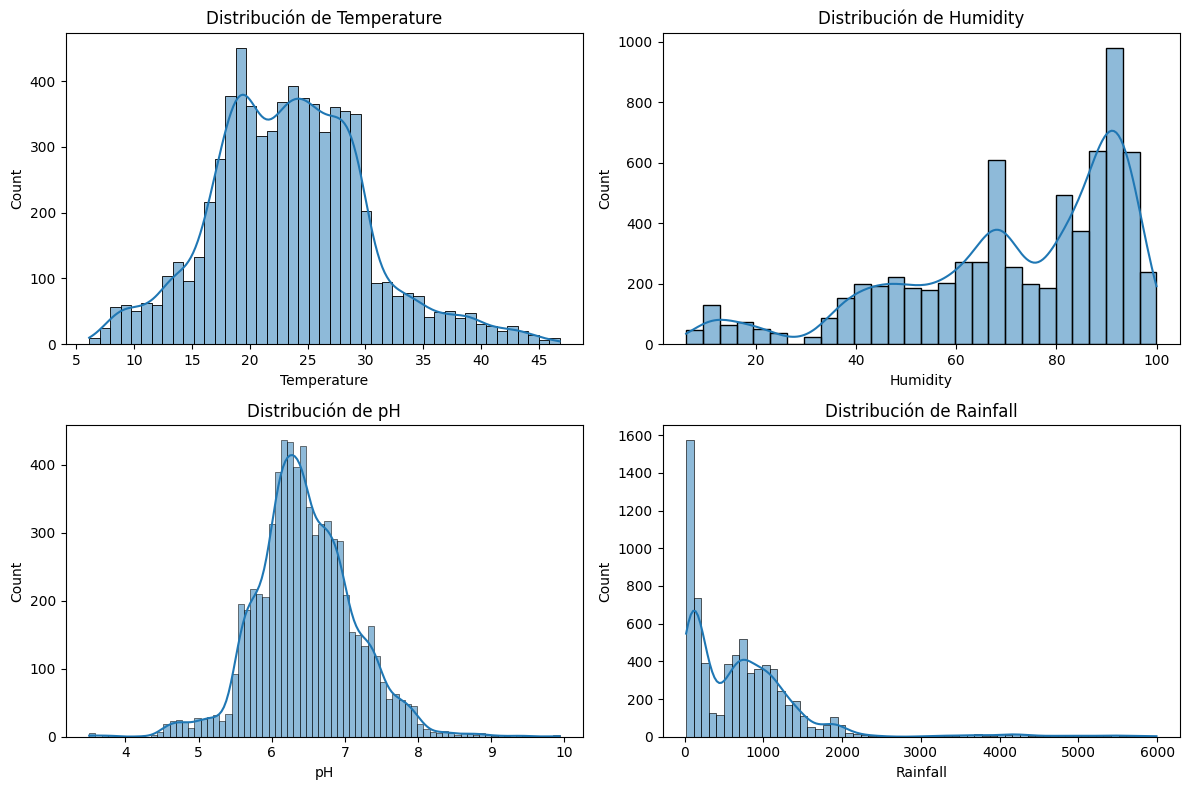

In [26]:
display(Markdown("##  Histogramas de variables numéricas"))
plot_histograms(df, numeric_cols)

1. Distribución de Temperatura

Forma: Aproximadamente normal.

Rango: Entre 5 °C y 45 °C.

Implicación: No parece haber outliers extremos. La normalidad sugiere que podrías usar modelos que asumen distribución normal sin transformaciones.

2. Distribución de Humedad

Forma: Asimétrica, con sesgo leve hacia la izquierda.

Pico: Alrededor de 80 %.

Rango: De 20 % a 100 %.

Implicación: Aunque no es perfectamente normal, la mayoría de los datos están en rangos altos. Podrías considerar transformar si usas modelos sensibles a la simetría.

3. Distribución de pH

Forma: Pico agudo cerca de 6.5, con cola hacia ambos lados.

Rango: De 3 a 9.

Implicación: Posible concentración en suelos ligeramente ácidos. La forma sugiere que esta variable podría tener un impacto fuerte si estás modelando crecimiento vegetal o calidad del suelo.

4. Distribución de Precipitación

Forma: Fuertemente sesgada a la derecha.

Rango: De 0 a 6000 mm, con mayoría debajo de 1000 mm.

Implicación: Hay valores extremos (outliers). Esta variable probablemente necesite transformación (logarítmica, raíz cuadrada) para estabilizar varianza y mejorar interpretabilidad.

##  Boxplots para detectar outliers

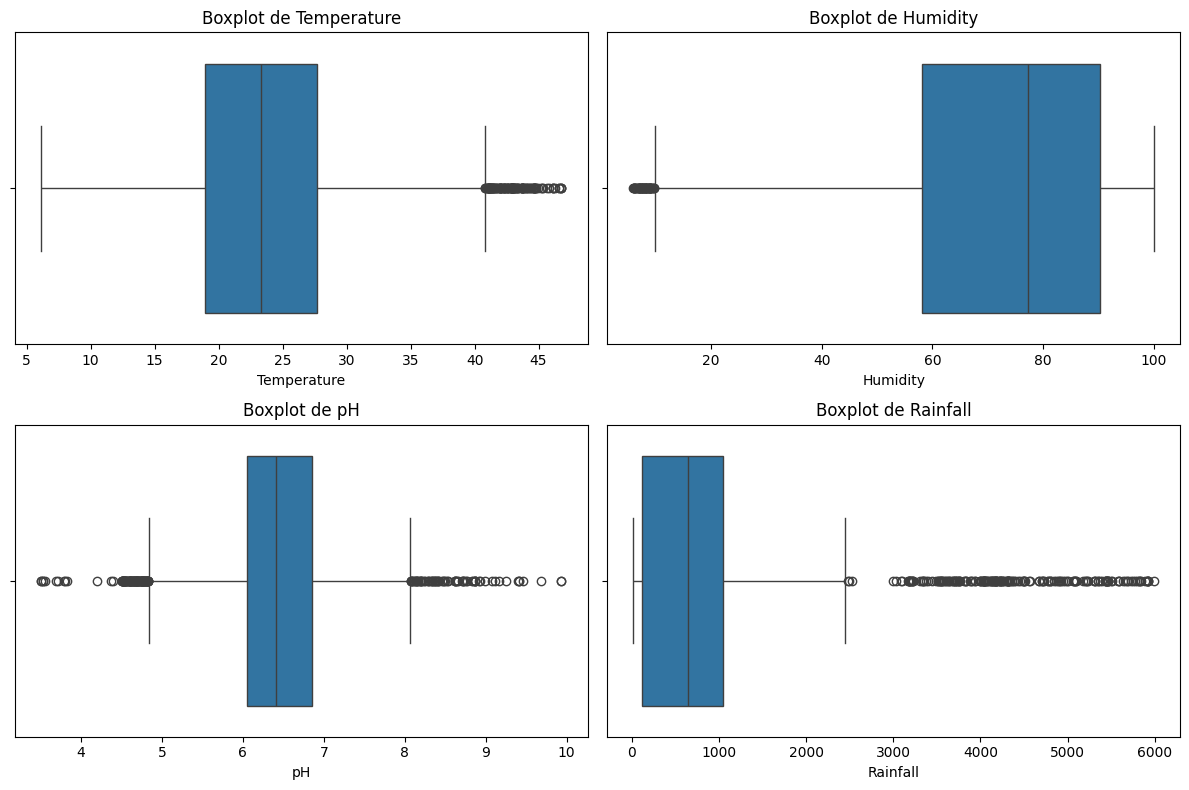

In [27]:
display(Markdown("##  Boxplots para detectar outliers"))
plot_boxplots(df, numeric_cols)

## Matriz de correlación

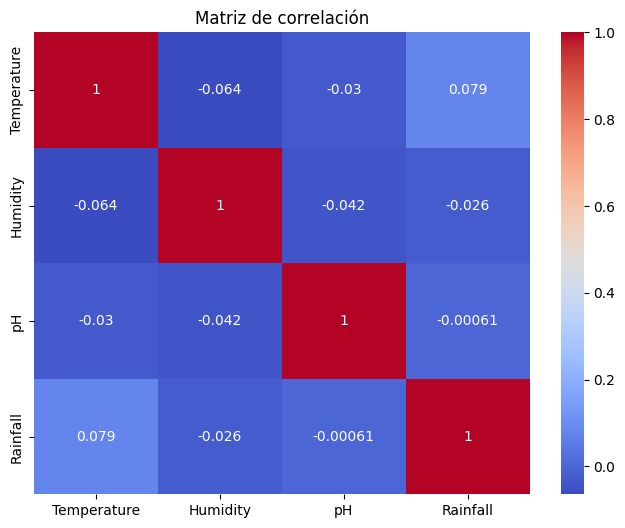

In [28]:
display(Markdown("## Matriz de correlación"))
plot_correlation(df, numeric_cols)

## Distribución por Categoría de Cultivo

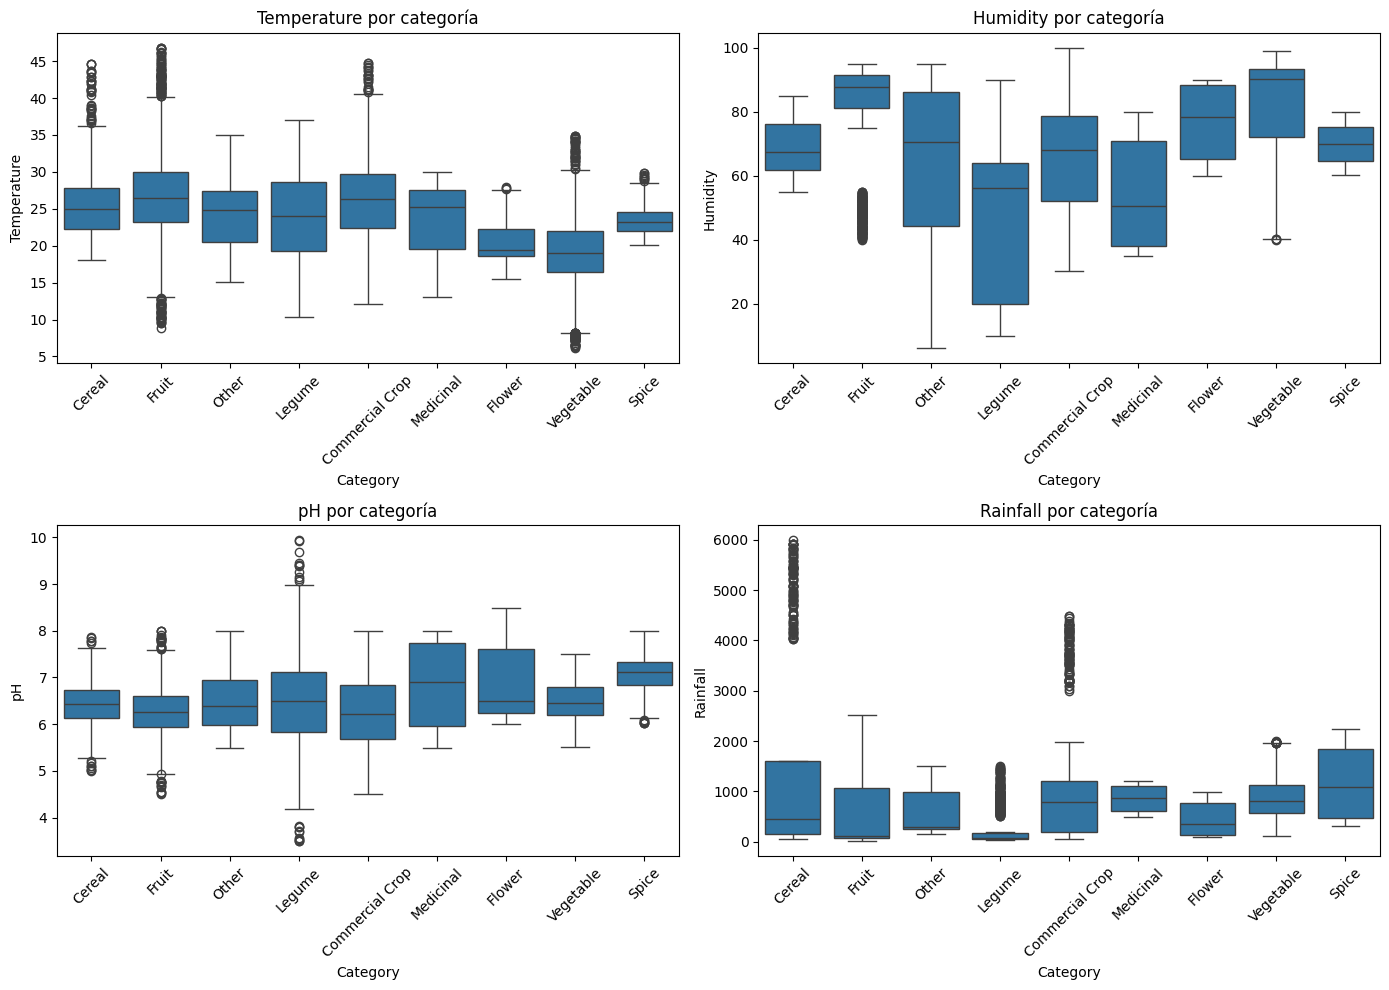

In [29]:
display(Markdown("## Distribución por Categoría de Cultivo"))
plot_category_boxplots(df, numeric_cols)

##  Pairplot – Relación entre variables

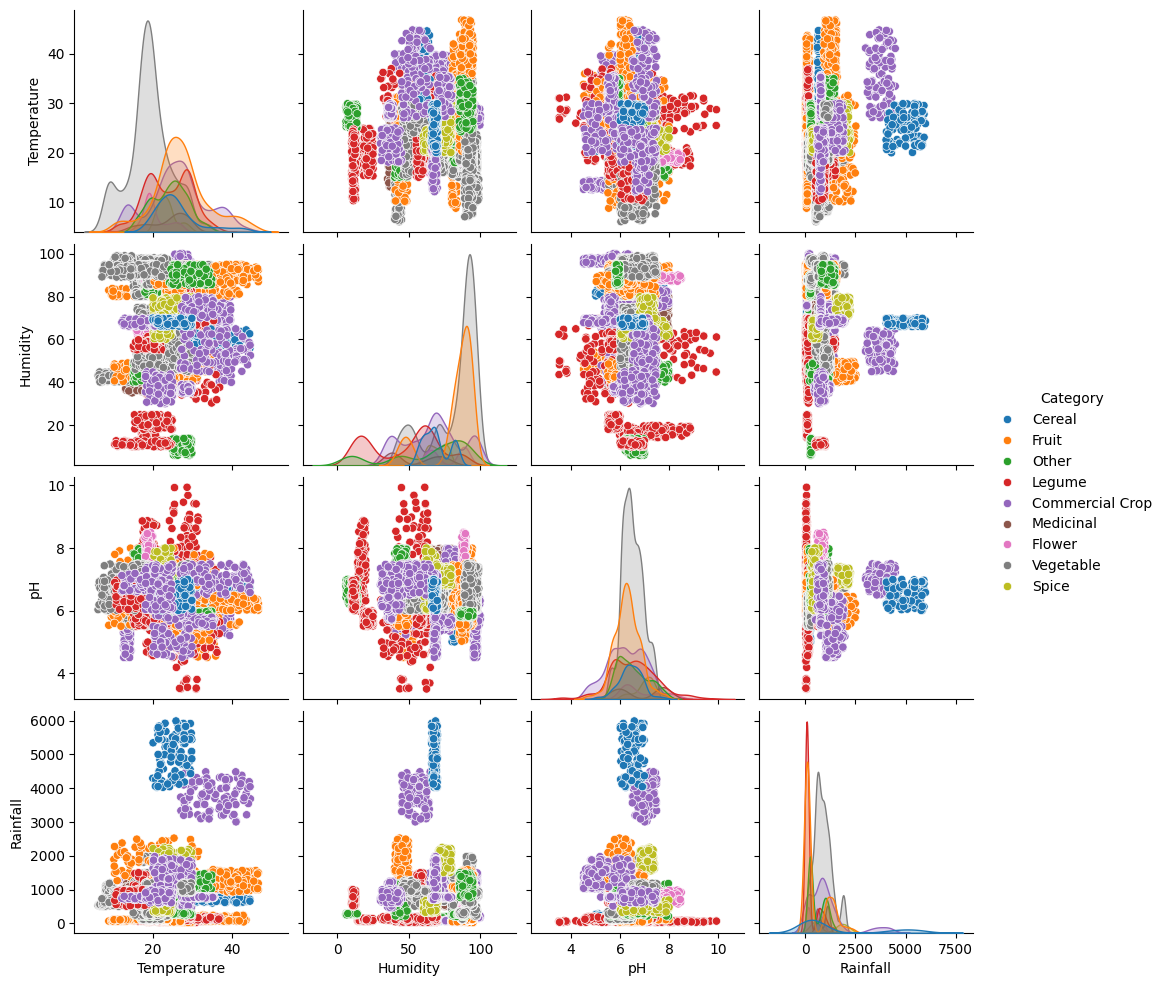

In [30]:
display(Markdown("##  Pairplot – Relación entre variables"))
plot_pairplot(df, numeric_cols)

Fase de EDA: Exploración de Variables Ambientales y Tipos de Cultivo

1. Las variables ambientales presentan comportamientos distintos por categoría de cultivo.
2. No hay correlaciones lineales fuertes, lo que indica una relación compleja.
3. Rainfall es la única variable que podría requerir transformación (log).
4. Cada tipo de cultivo tiene un “perfil ambiental ideal” claramente visible.
5. El dataset es adecuado para modelos de clasificación no lineales.

In [31]:
display(Markdown("# ✅ EDA completado con éxito"))

# ✅ EDA completado con éxito